## Iceburg or Boat?

In [2]:
import numpy as np
import pandas as pd
import os
# import keras

from skimage.util.montage import montage2d
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = r"/Users/nicapotato/Google Drive/Learning/Jupyter/Data/Icebergs"
os.chdir(path)

In [13]:
# df = pd.read_json("train.json", encoding="utf-8")

In [14]:
df.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [16]:
len(df.band_1[1])

5625

In [4]:
def load_and_format(in_path):
    out_df = pd.read_json(in_path)
    out_images = out_df.apply(lambda c_row: [np.stack([c_row['band_1'],c_row['band_2']], -1).reshape((75,75,2))],1)
    out_images = np.stack(out_images).squeeze()
    return out_df, out_images

train_df, train_images = load_and_format('train.json')
print('training', train_df.shape, 'loaded', train_images.shape)
#test_df, test_images = load_and_format('test.json')
#print('testing', test_df.shape, 'loaded', test_images.shape)
train_df.sample(3)

training (1604, 5) loaded (1604, 75, 75, 2)


,band_1,band_2,id,inc_angle,is_iceberg
951,"[-18.082331, -18.827244, -17.618873999999998, ...","[-27.389988, -25.806313, -23.527395, -25.52140...",a2d9dcdd,41.145,0
644,"[-20.028927, -22.251934, -23.207458, -21.89749...","[-26.334335, -24.995399, -25.24725, -23.411911...",86ff8b5e,35.5894,0
1116,"[-22.066954, -21.023447, -21.357616, -18.85889...","[-31.987085, -28.27441, -27.209553, -25.138798...",958a8c7e,38.7816,0


In [7]:
train_images

array([[[[-27.878361, -27.154118],
         [-27.15416 , -29.537888],
         [-28.668615, -31.0306  ],
         ..., 
         [-25.573483, -29.095308],
         [-26.488674, -29.540878],
         [-30.507013, -27.511766]],

        [[-28.66853 , -31.030518],
         [-27.878401, -33.529335],
         [-27.508776, -31.591175],
         ..., 
         [-26.488632, -34.288055],
         [-28.671562, -28.267496],
         [-31.594166, -26.488716]],

        [[-28.66853 , -33.529289],
         [-27.15416 , -37.051159],
         [-25.865042, -31.591175],
         ..., 
         [-27.157106, -31.594084],
         [-27.881393, -32.19339 ],
         [-32.837124, -29.54092 ]],

        ..., 
        [[-29.092905, -27.87895 ],
         [-28.669163, -27.878992],
         [-30.504612, -30.008141],
         ..., 
         [-30.011005, -25.289221],
         [-25.868538, -27.512272],
         [-26.489265, -28.672153]],

        [[-31.591682, -29.538437],
         [-27.878992, -29.538477],
        

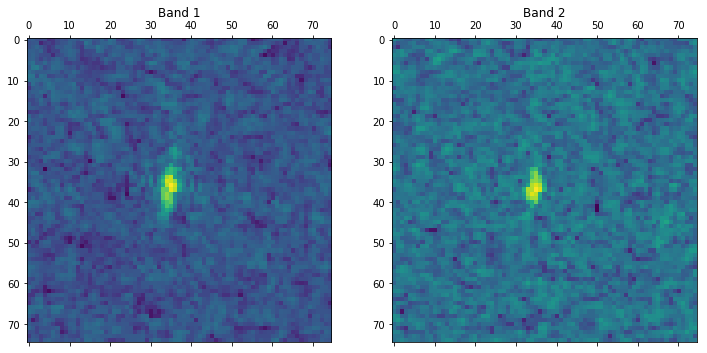

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (12,6))
# Set image base
ax1.matshow(train_images[0,:,:,0]) #image 0 band 1 (0)
ax1.set_title('Band 1')
ax2.matshow(train_images[0,:,:,1]) #image0, band 2 (1)
ax2.set_title('Band 2')

In [41]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = \
train_test_split(train_images, train_df.is_iceberg,
                 test_size=0.20, random_state=1)

num_classes = len(np.unique(Y_train)) # number of classes
img_size = 75

print("Number of training samples: %d"%X_train.shape[0])
#print( "Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"%X_train.shape[1])
print("Image columns: %d"%X_train.shape[2])
print("Number of classes: %d"%num_classes)

for i in (X_train, X_valid, Y_train, Y_valid):
    print("shape {}".format(i.shape))

Number of training samples: 1283
Image rows: 75
Image columns: 75
Number of classes: 2
shape (1283, 75, 75, 2)
shape (321, 75, 75, 2)
shape (1283,)
shape (321,)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Con2D, MaxPooling1D
from keras.optimizers import SGD
from keras.utils import np_utils


def deep_nn():
    # Define a deep neural network
    model = Sequential()
    model.add(Dense(512, input_dim=num_input_nodes))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

def deep_conv_nn():
    
    return model

In [ ]:
model = deep_conv_nn()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Need Log Loss 

# print model information
model.summary()